In [10]:
import healpy as h
import sys  ; sys.path.append("../../codes/")
from modules import local_eb_kernel as rk
from scipy.integrate import quad
import timeit
import os

%pylab notebook

Populating the interactive namespace from numpy and matplotlib


/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'rc']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
respath="../../figures/simulated/multipole_filter/"
figpath=respath
!mkdir $figpath

datapath = respath + "generated_data/"
!mkdir $datapath

genplots=True

mkdir: ../../figures/simulated/multipole_filter/: File exists
mkdir: ../../figures/simulated/multipole_filter/generated_data/: File exists


In [19]:
nside=64 ; upnside=nside ; npix=h.nside2npix(upnside)
lmax=3*nside ; lmin=2
ell=arange(lmax+1)
fll=ell*(ell+1)/(2.*pi)

odisc=min(180.,180.*(24./lmax))
print odisc

22.5


In [20]:
from matplotlib import rcParams,rc
params = {'backend': 'pdf',
          'savefig.dpi': 200,
          'axes.labelsize': 15,
          'text.fontsize': 15,
          'axes.linewidth' : 2,
          'lines.linewidth' : 2,
          'font.size': 15,
          'xtick.labelsize': 15,
          'ytick.major.pad': 6,
          'xtick.major.pad': 6,
          'ytick.labelsize': 15,
          'text.usetex': True,
          'font.family':'sans-serif',
          'font.sans-serif':'FreeSans'}
rc('text.latex', preamble='\usepackage{sfmath}')
rcParams.update(params)

In [21]:
cltemp=h.read_cl("../../data/planck_wp_highL_lensing_param.fits")
cl=[cltemp[0],cltemp[1],cltemp[2],cltemp[3]*0] # Reverse E and B spectra

#cl=[cltemp[0],cltemp[2],cltemp[1],cltemp[3]*0] # Reverse E and B spectra

random.seed(0) ; tqu=h.synfast(cl,nside,pol=True,new=True,verbose=False)

# Get teb maps from Healpix.
alm=h.map2alm(tqu,lmax=3*nside,pol=True) ; teb=h.alm2map(alm,upnside,pol=False,verbose=False)

# Get data power spectrum.
cld=h.alm2cl(alm)

# Get Q/U corresponding to E and B modes.
alm[2][:]=0.0 ; equ=h.alm2map(alm,nside=nside,pol=True,verbose=False)
alm=h.map2alm(tqu,lmax=3*nside,pol=True) ; alm[1][:]=0.0 ; bqu=h.alm2map(alm,nside=nside,pol=True,verbose=False)

fl=ones(3*nside+1,float) ; fl[:lmin+1]=0

In [22]:
lmin1=2 ; lmax1=3*nside
lmin2=64 ; lmax2=3*nside
lmin3=128 ; lmax3=3*nside

filenames=[]
filenames=append(filenames,datapath + "rteb_2beta_lmin" + str(lmin1) + "_lmax" + str(lmax1) + ".fits")
filenames=append(filenames,datapath + "rteb_2beta_lmin" + str(lmin2) + "_lmax" + str(lmax2) + ".fits")
filenames=append(filenames,datapath + "rteb_2beta_lmin" + str(lmin3) + "_lmax" + str(lmax3) + ".fits")

filenames=append(filenames,datapath + "requ_2beta_lmin" + str(lmin1) + "_lmax" + str(lmax1) + ".fits")
filenames=append(filenames,datapath + "requ_2beta_lmin" + str(lmin2) + "_lmax" + str(lmax2) + ".fits")
filenames=append(filenames,datapath + "requ_2beta_lmin" + str(lmin3) + "_lmax" + str(lmax3) + ".fits")

filenames=append(filenames,datapath + "rbqu_2beta_lmin" + str(lmin1) + "_lmax" + str(lmax1) + ".fits")
filenames=append(filenames,datapath + "rbqu_2beta_lmin" + str(lmin2) + "_lmax" + str(lmax2) + ".fits")
filenames=append(filenames,datapath + "rbqu_2beta_lmin" + str(lmin3) + "_lmax" + str(lmax3) + ".fits")

fexist=True
for f in filenames:
    fexist=fexist and os.path.isfile(f)
fexist

False

In [23]:
if not(fexist):
    y1=rk.real_space_queb_kernels(nside,tmax=2.2*odisc,maxlmax=3*nside,sampling=2500)
    y2=rk.real_space_queb_kernels(nside,tmax=2.2*odisc,maxlmax=3*nside,sampling=2500)
    y3=rk.real_space_queb_kernels(nside,tmax=2.2*odisc,maxlmax=3*nside,sampling=2500)
    
    y1.calc_qu2eb_rad_kernel(lmax1,lmin1) ; y1.calc_qu2queb_rad_kernel(lmax1,lmin1)
    y2.calc_qu2eb_rad_kernel(lmax2,lmin2) ; y2.calc_qu2queb_rad_kernel(lmax2,lmin2)
    y3.calc_qu2eb_rad_kernel(lmax3,lmin3) ; y3.calc_qu2queb_rad_kernel(lmax3,lmin3)

<IPython.core.display.Javascript object>


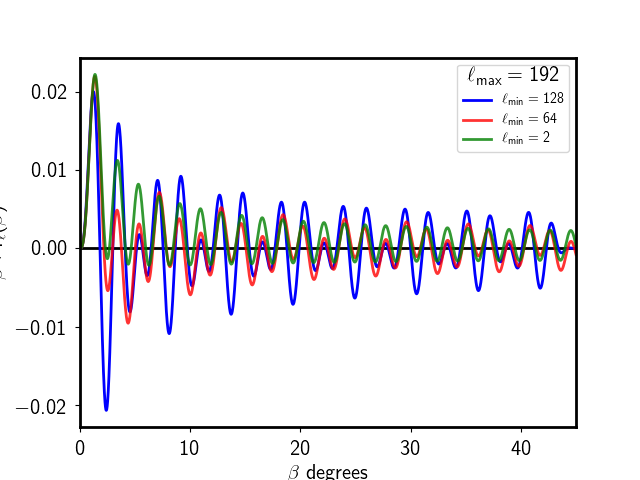

<IPython.core.display.Javascript object>


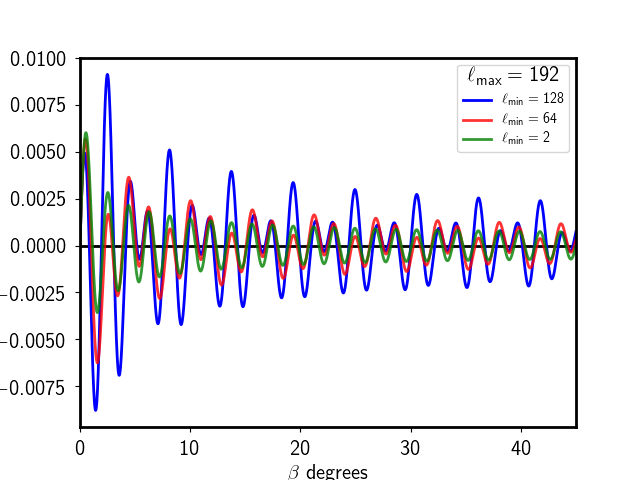

<IPython.core.display.Javascript object>


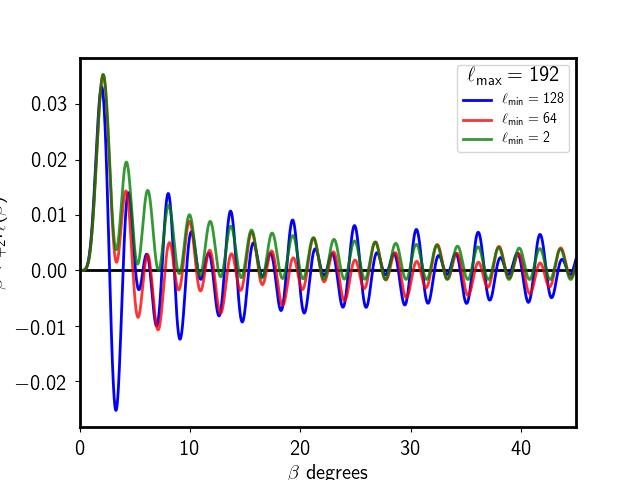

In [80]:
figpath = respath
betapow=1.
figure()
plot(y3.theta*180/pi,(y1.theta**betapow)*y3.fn_rad_ker(y3.theta)/max(y3.fn_rad_ker(y3.theta)),"b-",lw=2,label=r"$\ell_{\rm min}=128$",alpha=1.)
plot(y2.theta*180/pi,(y1.theta**betapow)*y2.rad_ker/max(y2.rad_ker),"r-",lw=2,label=r"$\ell_{\rm min}=64$",alpha=0.8)
plot(y1.theta*180/pi,(y1.theta**betapow)*y1.rad_ker/max(y1.rad_ker),"g-",lw=2,label=r"$\ell_{\rm min}=2$",alpha=0.8)
hlines(0,1e-3,60)
xlim(1e-2,2*odisc)
legend(loc=0)
legend(loc=0,fontsize=10,title=r"$\ell_{\rm max}=192$")
xlabel(r"$\beta$ degrees")
ylabel(r"$\beta*{\rm f}_{\ell}(\beta)$")
#semilogx()
#loglog()
savefig(figpath + "f_rad_ker_fn_vary_lmin.pdf",dpi=300,bbox_inches="tight")


figure()
plot(y3.theta*180/pi,(y1.theta**betapow)*y3.rad_ker_m2/max(y3.rad_ker_m2),"b-",lw=2,label=r"$\ell_{\rm min}=128$",alpha=1.)
plot(y2.theta*180/pi,(y1.theta**betapow)*y2.rad_ker_m2/max(y2.rad_ker_m2),"r-",lw=2,label=r"$\ell_{\rm min}=64$",alpha=0.8)
plot(y1.theta*180/pi,(y1.theta**betapow)*y1.rad_ker_m2/max(y1.rad_ker_m2),"g-",lw=2,label=r"$\ell_{\rm min}=2$",alpha=0.8)
hlines(0,1e-3,60)
xlim(1e-2,2*odisc)
legend(loc=0)
legend(loc=0,fontsize=10,title=r"$\ell_{\rm max}=192$")
xlabel(r"$\beta$ degrees")
ylabel(r"$\beta *{}_{-2}{\rm f}_{\ell}(\beta)$")
#semilogx()
#loglog()
savefig(figpath + "fm2_rad_ker_fn_vary_lmin.pdf",dpi=300,bbox_inches="tight")

figure()
plot(y3.theta*180/pi,(y1.theta**betapow)*y3.rad_ker_p2/max(y3.rad_ker_p2),"b-",lw=2,label=r"$\ell_{\rm min}=128$",alpha=1.)
plot(y2.theta*180/pi,(y1.theta**betapow)*y2.rad_ker_p2/max(y2.rad_ker_p2),"r-",lw=2,label=r"$\ell_{\rm min}=64$",alpha=0.8)
plot(y1.theta*180/pi,(y1.theta**betapow)*y1.rad_ker_p2/max(y1.rad_ker_p2),"g-",lw=2,label=r"$\ell_{\rm min}=2$",alpha=0.8)
hlines(0,1e-3,60)
xlim(1e-2,2*odisc)
legend(loc=0)
legend(loc=0,fontsize=10,title=r"$\ell_{\rm max}=192$")
xlabel(r"$\beta$ degrees")
ylabel(r"$\beta * {}_{+2}{\rm f}_{\ell}(\beta)$")
#semilogx()
#loglog()
savefig(figpath + "fp2_rad_ker_fn_vary_lmin.pdf",dpi=300,bbox_inches="tight")

In [39]:
if not(fexist):
    disc=2.*odisc 
    y1.setup_taper(disc,3.) ; y2.setup_taper(disc,3.) ; y3.setup_taper(disc,3.)
    y1.setup_fn_rad_ker() ; y2.setup_fn_rad_ker() ; y3.setup_fn_rad_ker()

    rteb1=y1.convert_qu2eb(tqu,discsize=disc)
    requ1,rbqu1=y1.decompose_qu2_equ_bqu(tqu,discsize=disc)
    h.write_map(filenames[0],rteb1,overwrite=True)
    h.write_map(filenames[3],requ1,overwrite=True)
    h.write_map(filenames[6],rbqu1,overwrite=True)

    rteb2=y2.convert_qu2eb(tqu,discsize=disc)
    requ2,rbqu2=y2.decompose_qu2_equ_bqu(tqu,discsize=disc)
    h.write_map(filenames[1],rteb2,overwrite=True)
    h.write_map(filenames[4],requ2,overwrite=True)
    h.write_map(filenames[7],rbqu2,overwrite=True)

    rteb3=y3.convert_qu2eb(tqu,discsize=disc)
    requ3,rbqu3=y3.decompose_qu2_equ_bqu(tqu,discsize=disc)
    h.write_map(filenames[2],rteb3,overwrite=True)
    h.write_map(filenames[5],requ3,overwrite=True)
    h.write_map(filenames[8],rbqu3,overwrite=True)
else:
    rteb1=h.read_map(filenames[0],(0,1,2))
    rteb2=h.read_map(filenames[1],(0,1,2))
    rteb3=h.read_map(filenames[2],(0,1,2))
    requ1=h.read_map(filenames[3],(0,1,2))
    requ2=h.read_map(filenames[4],(0,1,2))
    requ3=h.read_map(filenames[5],(0,1,2))
    rbqu1=h.read_map(filenames[6],(0,1,2))
    rbqu2=h.read_map(filenames[7],(0,1,2))
    rbqu3=h.read_map(filenames[8],(0,1,2))

In [83]:
figpath

'../../figures/simulated/multipole_filter/eqmask/'

mkdir: ../../figures/simulated/multipole_filter/eqmask/: File exists


<IPython.core.display.Javascript object>


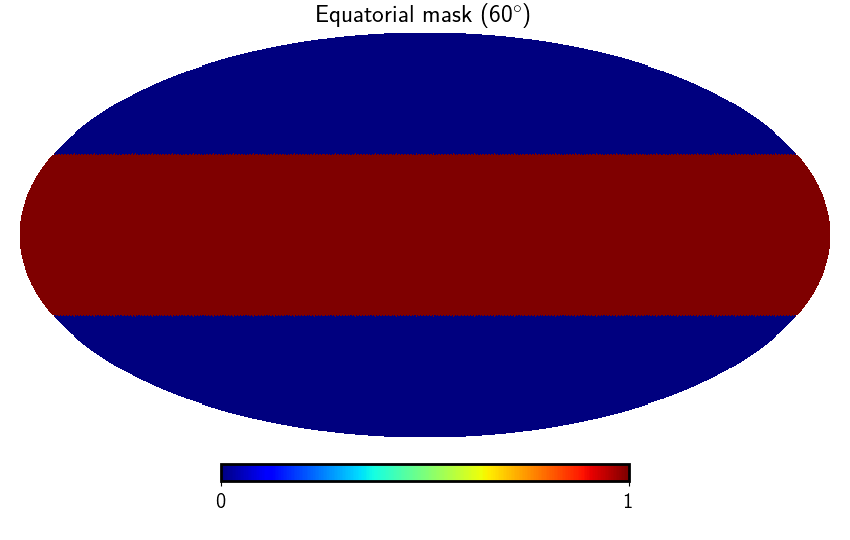

0.494791666667


In [40]:
pindex=arange(npix) ; theta=h.pix2ang(nside,pindex)[0]*180/pi
mask=zeros(npix,float)
wband=60
capmask=zeros(npix,float) ; capmask[theta<wband]=1. ; capmask[theta>180-wband]=1.

capmaskon=False ; eqmaskon=True ; nomask=False

if capmaskon:
    eqmaskon=False ; nomaskon=False
    mask[:]=capmask[:]
    figpath= respath + "capmask/" 
    !mkdir $figpath
    h.mollview(mask,title=r"Cap mask $(" + str(wband) + "^\circ)$")
    savefig(figpath + "capmask.pdf",dpi=300,bbox_inches="tight") 
    
if eqmaskon:
    nomask=False
    mask[:]=1- capmask[:]
    figpath=respath + "eqmask/" 
    !mkdir $figpath
    h.mollview(mask,title=r"Equatorial mask $(" + str(wband) + "^\circ)$")
    savefig(figpath + "eqmask.pdf",dpi=300,bbox_inches="tight") 
    
if nomask:
    mask[:]=1. 
    figpath=respath
    h.mollview(mask,title="No mask")
    savefig(figpath + "nomask.pdf",dpi=300,bbox_inches="tight") 

fsky=sum(mask)/size(mask)
print fsky
fll=fll/fsky

In [42]:
clteb=h.alm2cl(h.map2alm(teb*mask,lmax=3*nside,pol=False))

clrteb1=h.alm2cl(h.map2alm(rteb1*mask,lmax=3*nside,pol=False))
clrteb2=h.alm2cl(h.map2alm(rteb2*mask,lmax=3*nside,pol=False))
clrteb3=h.alm2cl(h.map2alm(rteb3*mask,lmax=3*nside,pol=False))

clrequ1=h.alm2cl(h.map2alm(requ1*mask,lmax=3*nside,pol=True))
clrequ2=h.alm2cl(h.map2alm(requ2*mask,lmax=3*nside,pol=True))
clrequ3=h.alm2cl(h.map2alm(requ3*mask,lmax=3*nside,pol=True))

clrbqu1=h.alm2cl(h.map2alm(rbqu1*mask,lmax=3*nside,pol=True))
clrbqu2=h.alm2cl(h.map2alm(rbqu2*mask,lmax=3*nside,pol=True))
clrbqu3=h.alm2cl(h.map2alm(rbqu3*mask,lmax=3*nside,pol=True))

<IPython.core.display.Javascript object>


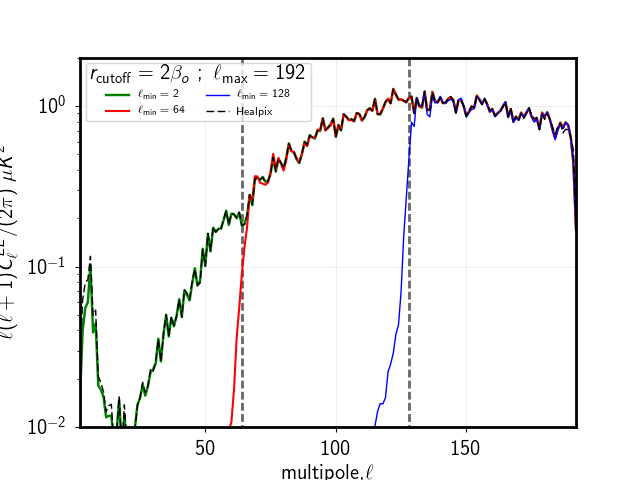

<IPython.core.display.Javascript object>


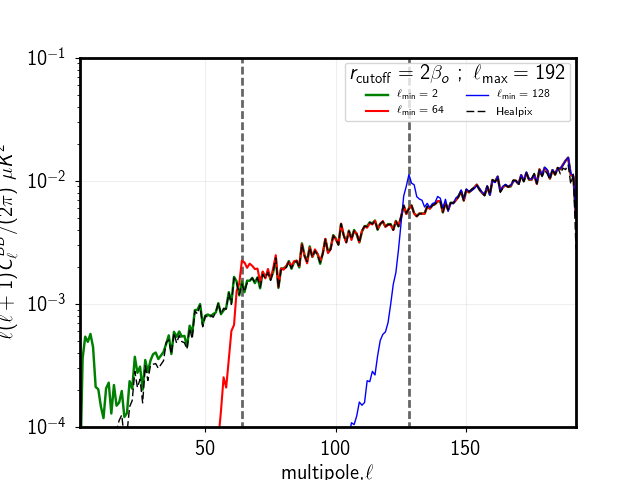

In [81]:
figure()
plot(ell,fll*clrteb1[1],"g-",lw=1.75,label=r"$\ell_{\rm min}=2$")
plot(ell,fll*clrteb2[1],"r-",lw=1.5,label=r"$\ell_{\rm min}=64$")
plot(ell,fll*clrteb3[1],"b-",lw=1.,label=r"$\ell_{\rm min}=128$")
plot(ell,fll*clteb[1],"k--",lw=1,label="Healpix",alpha=1.)
semilogy()
ylim(1e-2,2e0)
xlim(2,3*nside)
xlabel("multipole,$\ell$")
ylabel("$\ell(\ell+1)C^{EE}_{\ell}/(2\pi) ~ \mu K^2$")
legend(loc=0,fontsize=8,ncol=2,title=r"$r_{\rm cutoff}= 2\beta_o~;~\ell_{\rm max}=192$")
grid(alpha=0.2,linestyle="solid")
vlines(64,1e-3,1e2,linestyle="dashed",alpha=0.6)
vlines(128,1e-3,1e2,linestyle="dashed",alpha=0.6)
if genplots:
    savefig(figpath + "ee-spectrum-rteb-2beta_multipole_filtering.pdf",dpi=300,bbox_inches="tight")
    
figure()
plot(ell,fll*clrteb1[2],"g-",lw=1.75,label=r"$\ell_{\rm min}=2$")
plot(ell,fll*clrteb2[2],"r-",lw=1.5,label=r"$\ell_{\rm min}=64$")
plot(ell,fll*clrteb3[2],"b-",lw=1.,label=r"$\ell_{\rm min}=128$")
plot(ell,fll*clteb[2],"k--",lw=1,label="Healpix",alpha=1.)
semilogy()
ylim(1e-4,1e-1)
xlim(2,3*nside)
xlabel("multipole,$\ell$")
ylabel("$\ell(\ell+1)C^{BB}_{\ell}/(2\pi) ~ \mu K^2$")
legend(loc=0,fontsize=8,ncol=2,title=r"$r_{\rm cutoff}= 2\beta_o~;~\ell_{\rm max}=192$")
grid(alpha=0.2,linestyle="solid")
vlines(64,1e-6,1e2,linestyle="dashed",alpha=0.6)
vlines(128,1e-6,1e2,linestyle="dashed",alpha=0.6)
if genplots:
    savefig(figpath + "bb-spectrum-rteb-2beta_multipole_filtering.pdf",dpi=300,bbox_inches="tight")

<IPython.core.display.Javascript object>


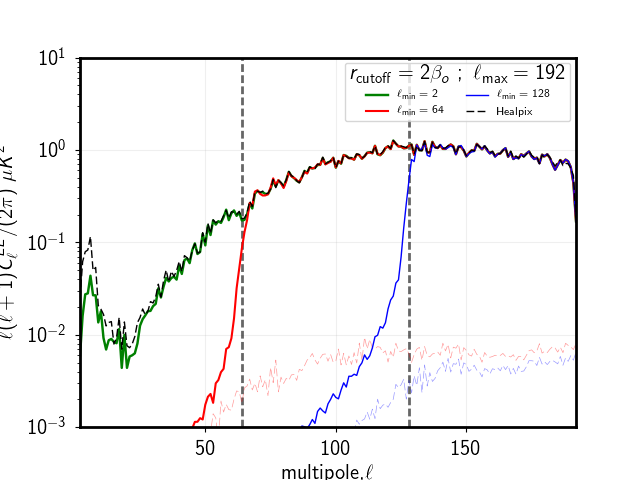

<IPython.core.display.Javascript object>


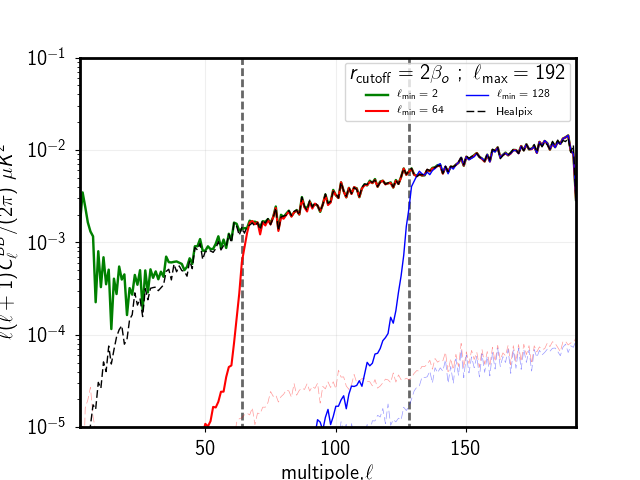

In [82]:
figure()
plot(ell,fll*clrequ1[1],"g-",lw=1.75,label=r"$\ell_{\rm min}=2$")
plot(ell,fll*clrequ2[1],"r-",lw=1.5,label=r"$\ell_{\rm min}=64$")
plot(ell,fll*clrequ2[2],"r--",lw=0.5,alpha=0.4)
plot(ell,fll*clrequ3[1],"b-",lw=1.,label=r"$\ell_{\rm min}=128$")
plot(ell,fll*clrequ3[2],"b--",lw=0.5,alpha=0.4)
plot(ell,fll*clteb[1],"k--",lw=1,label="Healpix",alpha=1.)
semilogy()
ylim(1e-3,1e1)
xlim(2,3*nside)
xlabel("multipole,$\ell$")
ylabel("$\ell(\ell+1)C^{EE}_{\ell}/(2\pi) ~ \mu K^2$")
legend(loc=0,fontsize=8,ncol=2,title=r"$r_{\rm cutoff}= 2\beta_o~;~\ell_{\rm max}=192$")
grid(alpha=0.2,linestyle="solid")
vlines(64,1e-3,1e2,linestyle="dashed",alpha=0.6)
vlines(128,1e-3,1e2,linestyle="dashed",alpha=0.6)
if genplots:
    savefig(figpath + "ee-spectrum-requ-2beta_multipole_filtering.pdf",dpi=300,bbox_inches="tight")
    
figure()
plot(ell,fll*clrbqu1[2],"g-",lw=1.75,label=r"$\ell_{\rm min}=2$")
plot(ell,fll*clrbqu2[2],"r-",lw=1.5,label=r"$\ell_{\rm min}=64$")
plot(ell,fll*clrbqu2[1],"r--",lw=0.5,alpha=0.4)
plot(ell,fll*clrbqu3[2],"b-",lw=1.,label=r"$\ell_{\rm min}=128$")
plot(ell,fll*clrbqu3[1],"b--",lw=0.5,alpha=0.4)
plot(ell,fll*clteb[2],"k--",lw=1,label="Healpix",alpha=1.)
semilogy()
ylim(1e-5,1e-1)
xlim(2,3*nside)
xlabel("multipole,$\ell$")
ylabel("$\ell(\ell+1)C^{BB}_{\ell}/(2\pi) ~ \mu K^2$")
legend(loc=0,fontsize=8,ncol=2,title=r"$r_{\rm cutoff}= 2\beta_o~;~\ell_{\rm max}=192$")
grid(alpha=0.2,linestyle="solid")
vlines(64,1e-6,1e2,linestyle="dashed",alpha=0.6)
vlines(128,1e-6,1e2,linestyle="dashed",alpha=0.6)
if genplots:
    savefig(figpath + "bb-spectrum-rbqu-2beta_multipole_filtering.pdf",dpi=300,bbox_inches="tight")